I have used scrapy to generate a csv file containing user and critic reviews for the most discussed movies from 2010 to 2018. In this notebook, I will look at the resulting dataframe and analyze what the result is.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
meta_df = pd.read_csv("./metacritic/metacritic.csv")

In [10]:
meta_df.head(5)

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,ReviewCritic,Pros:,8
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,fantasy,1. its theme - dream is a fascinating topic to...,10
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,vikesh2206,2. its plot - there are several sweet twists a...,4
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,eagleeyeviking,3. its edgy drive - although you know what's c...,1


Rearranging the columns into a more easy to read way:

In [7]:
cols = list(meta_df.columns.values)
cols

['genre',
 'metascore',
 'movie',
 'release_date',
 'review',
 'review_score',
 'user_score',
 'user_type',
 'username']

In [8]:
meta_df = meta_df[['movie', 'genre', 'release_date', 'metascore', 'user_score', 'user_type', 'username', 'review', 'review_score']]

In [11]:
meta_df.head(5)

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,ReviewCritic,Pros:,8
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,fantasy,1. its theme - dream is a fascinating topic to...,10
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,vikesh2206,2. its plot - there are several sweet twists a...,4
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,eagleeyeviking,3. its edgy drive - although you know what's c...,1


In [21]:
null_col = meta_df.columns[meta_df.isnull().any()]

meta_df[null_col].isnull().sum()

user_score      127
review        15953
dtype: int64

In [28]:
meta_df_no_missing = meta_df.dropna()

In [30]:
print(meta_df.shape)
print(meta_df_no_missing.shape)

(129805, 9)
(113725, 9)


The genres in the genre column all appear in a list, going to multiply each review to have a new observation for every genre each movie is specified as - 

In [57]:
meta_df_genre = meta_df_no_missing.copy()

In [58]:
meta_df_genre.genre = meta_df_genre.genre.str.split(',')

In [59]:
meta_df_genre.genre.head()

0    [Action, Sci-Fi, Drama, Mystery, Thriller]
1    [Action, Sci-Fi, Drama, Mystery, Thriller]
2    [Action, Sci-Fi, Drama, Mystery, Thriller]
3    [Action, Sci-Fi, Drama, Mystery, Thriller]
4    [Action, Sci-Fi, Drama, Mystery, Thriller]
Name: genre, dtype: object

In [60]:
# i keeps tracks of index
index=0

# save [index, genre] in a nested list
genre_list = []
for item in meta_df_genre.genre:
    genre_list.extend(map(lambda x: [index, x], item))
    index += 1
    
genre = pd.DataFrame(genre_list, columns=['index', 'genres'])
genre.head()

,index,genres
0,0,Action
1,0,Sci-Fi
2,0,Drama
3,0,Mystery
4,0,Thriller


In [62]:
meta_df_genre = pd.merge(meta_df_genre.drop('genre', axis=1), genre, how='right', left_index=True, right_on='index')

meta_df_genre.head()

,movie,release_date,metascore,user_score,user_type,username,review,review_score,index,genres
0,Inception,"July 16, 2010",74.0,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8.0,0,Action
1,Inception,"July 16, 2010",74.0,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8.0,0,Sci-Fi
2,Inception,"July 16, 2010",74.0,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8.0,0,Drama
3,Inception,"July 16, 2010",74.0,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8.0,0,Mystery
4,Inception,"July 16, 2010",74.0,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8.0,0,Thriller


In [65]:
meta_df_genre.user_score = meta_df_genre.user_score * 10

(406399, 10)


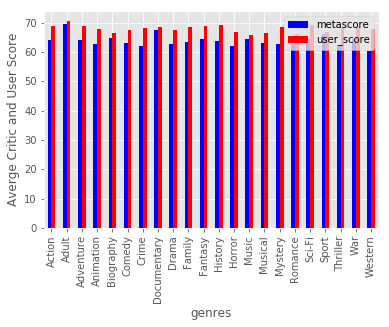

In [67]:
meta_df_genre.groupby('genres')['metascore', 'user_score'].mean().plot.bar(color=['b', 'r'])

plt.ylabel('Averge Critic and User Score')

print(meta_df_genre.shape)